In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [6]:
from tensorflow.keras import datasets,models

In [39]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [40]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [17]:
print(x_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [10]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

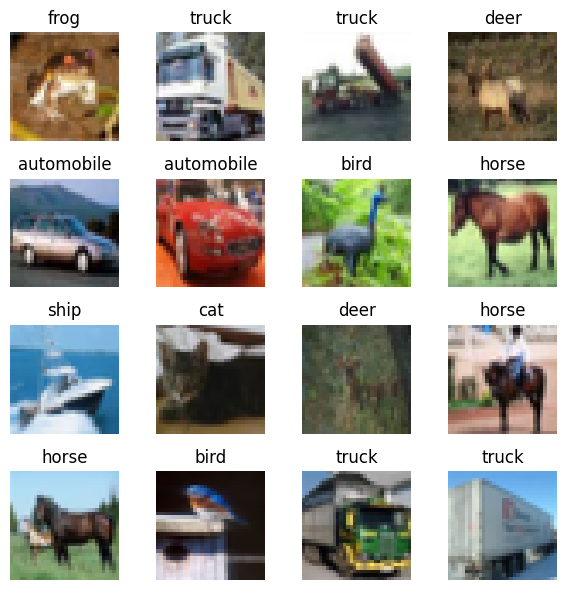

In [16]:
plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [41]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
    
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 33ms/step - accuracy: 0.3328 - loss: 1.7813 - val_accuracy: 0.5614 - val_loss: 1.2192
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.5661 - loss: 1.2081 - val_accuracy: 0.6264 - val_loss: 1.0495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6393 - loss: 1.0240 - val_accuracy: 0.6633 - val_loss: 0.9633
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.6802 - loss: 0.9151 - val_accuracy: 0.6823 - val_loss: 0.9289
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7066 - loss: 0.8445 - val_accuracy: 0.6815 - val_loss: 0.9414
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7276 - loss: 0.7845 - val_accuracy: 0.6915 - val_loss: 0.9136
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.7421 - loss: 0.7361 - val_accuracy: 0.7022 - val_loss: 0.8843
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7610 

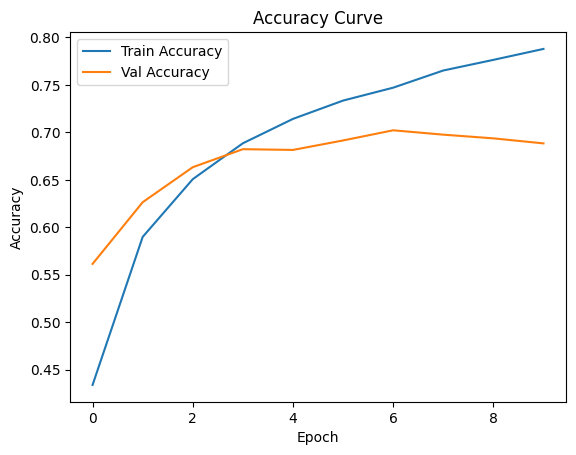

In [43]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [45]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6904 - loss: 0.9712 

Test accuracy: 0.69


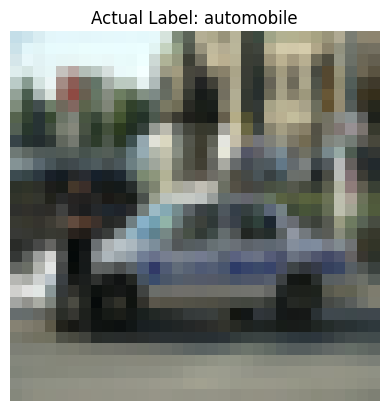

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Label: automobile


In [55]:
# Predict a random image
import numpy as np
index = np.random.randint(len(x_test))
image = x_test[index]

plt.imshow(image)

plt.title(f"Actual Label: {class_names[y_test[index][0]]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.array([image]))
index = np.argmax(prediction)
print(f"Predicted Label: {class_names[index]}")
